In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import random
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

C:\Users\dengd\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Loading the dataset

In [2]:
df_songs = pd.read_csv('C:/Users/dengd/Documents/GitHub/MelodyMate/playlists.csv')

In [3]:
df_songs = df_songs.dropna() # drop null-values

In [4]:
df_songs.drop_duplicates(inplace = True) # # delete duplicated rows

In [5]:
df_songs.reset_index(drop =True) # reset the index

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.707,0.681,-4.325,0.0668,0.06320,0.000005,0.0322,0.646,117.999,0yLdNVWF3Srea0uzk55zFn,200455
1,0.644,0.735,-5.747,0.0391,0.05210,0.144000,0.1610,0.418,88.980,1Qrg8KqiBpW07V7PNxwwwL,153947
2,0.696,0.809,-8.254,0.0500,0.25200,0.000128,0.2480,0.857,132.962,6AQbmUe0Qwf5PZnt4HmTXv,131013
3,0.538,0.742,-5.355,0.1140,0.13800,0.000047,0.0934,0.250,96.107,5Z2MiIZ5I3jJvvmeWMLbOQ,272373
4,0.662,0.398,-6.691,0.0275,0.71600,0.000000,0.1110,0.468,107.001,4sx6NRwL6Ol3V6m9exwGlQ,145850
...,...,...,...,...,...,...,...,...,...,...,...
2418,0.636,0.656,-7.123,0.3440,0.02190,0.000000,0.1300,0.362,75.962,2nLwnTorexhx3qKRY7zymH,177012
2419,0.753,0.424,-10.620,0.5990,0.19700,0.000000,0.0694,0.714,162.878,5ckdswsm7RQzCTBoNiyl7T,100180
2420,0.501,0.699,-4.733,0.2480,0.17100,0.000000,0.1230,0.671,85.267,7rGzPK1JTUn91efeiIidNo,201124
2421,0.645,0.842,-3.023,0.0983,0.00816,0.000000,0.3960,0.237,150.039,2kMuUWfsueRPYWxyaTSHd8,121600


In [6]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2423 entries, 0 to 2898
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      2423 non-null   float64
 1   energy            2423 non-null   float64
 2   loudness          2423 non-null   float64
 3   speechiness       2423 non-null   float64
 4   acousticness      2423 non-null   float64
 5   instrumentalness  2423 non-null   float64
 6   liveness          2423 non-null   float64
 7   valence           2423 non-null   float64
 8   tempo             2423 non-null   float64
 9   id                2423 non-null   object 
 10  duration_ms       2423 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 227.2+ KB


In [7]:
X_id = df_songs

In [8]:
X_id 

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.707,0.681,-4.325,0.0668,0.06320,0.000005,0.0322,0.646,117.999,0yLdNVWF3Srea0uzk55zFn,200455
1,0.644,0.735,-5.747,0.0391,0.05210,0.144000,0.1610,0.418,88.980,1Qrg8KqiBpW07V7PNxwwwL,153947
2,0.696,0.809,-8.254,0.0500,0.25200,0.000128,0.2480,0.857,132.962,6AQbmUe0Qwf5PZnt4HmTXv,131013
3,0.538,0.742,-5.355,0.1140,0.13800,0.000047,0.0934,0.250,96.107,5Z2MiIZ5I3jJvvmeWMLbOQ,272373
4,0.662,0.398,-6.691,0.0275,0.71600,0.000000,0.1110,0.468,107.001,4sx6NRwL6Ol3V6m9exwGlQ,145850
...,...,...,...,...,...,...,...,...,...,...,...
2878,0.636,0.656,-7.123,0.3440,0.02190,0.000000,0.1300,0.362,75.962,2nLwnTorexhx3qKRY7zymH,177012
2881,0.753,0.424,-10.620,0.5990,0.19700,0.000000,0.0694,0.714,162.878,5ckdswsm7RQzCTBoNiyl7T,100180
2893,0.501,0.699,-4.733,0.2480,0.17100,0.000000,0.1230,0.671,85.267,7rGzPK1JTUn91efeiIidNo,201124
2895,0.645,0.842,-3.023,0.0983,0.00816,0.000000,0.3960,0.237,150.039,2kMuUWfsueRPYWxyaTSHd8,121600


In [9]:
X= df_songs.select_dtypes(include=['float64', 'int64']) #extract all numerical columns

In [10]:
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.707,0.681,-4.325,0.0668,0.06320,0.000005,0.0322,0.646,117.999,200455
1,0.644,0.735,-5.747,0.0391,0.05210,0.144000,0.1610,0.418,88.980,153947
2,0.696,0.809,-8.254,0.0500,0.25200,0.000128,0.2480,0.857,132.962,131013
3,0.538,0.742,-5.355,0.1140,0.13800,0.000047,0.0934,0.250,96.107,272373
4,0.662,0.398,-6.691,0.0275,0.71600,0.000000,0.1110,0.468,107.001,145850
...,...,...,...,...,...,...,...,...,...,...
2878,0.636,0.656,-7.123,0.3440,0.02190,0.000000,0.1300,0.362,75.962,177012
2881,0.753,0.424,-10.620,0.5990,0.19700,0.000000,0.0694,0.714,162.878,100180
2893,0.501,0.699,-4.733,0.2480,0.17100,0.000000,0.1230,0.671,85.267,201124
2895,0.645,0.842,-3.023,0.0983,0.00816,0.000000,0.3960,0.237,150.039,121600


# Scaling features

In [11]:
X.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000
mean,0.604803,0.565495,-10.140818,0.105301,0.338065,0.143268,0.164677,0.508754,118.764596,200770.492365
std,0.171495,0.266795,7.508789,0.115157,0.348887,0.319360,0.126002,0.248397,29.464144,60145.674977
min,0.107000,0.002900,-40.436000,0.022700,0.000005,0.000000,0.010400,0.036400,46.877000,70160.000000
25%,0.479000,0.435000,-10.846500,0.036400,0.039550,0.000000,0.094400,0.308000,95.418000,156986.000000
50%,0.608000,0.617000,-7.495000,0.050600,0.193000,0.000011,0.115000,0.497000,117.932000,190960.000000
75%,0.738000,0.768500,-5.502500,0.122000,0.595000,0.005310,0.192000,0.714500,137.007000,233175.500000
max,0.975000,0.996000,0.844000,0.909000,0.996000,0.975000,0.893000,0.985000,208.571000,547107.000000


### K-Means is a distance based algorithm: we need to scale / normalize!

In [12]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455
1,0.644,0.735,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947
2,0.696,0.809,-8.254,0.0500,0.2520,0.000128,0.2480,0.857,132.962,131013
3,0.538,0.742,-5.355,0.1140,0.1380,0.000047,0.0934,0.250,96.107,272373
4,0.662,0.398,-6.691,0.0275,0.7160,0.000000,0.1110,0.468,107.001,145850


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.596043,0.433025,0.774695,-0.334403,-0.787999,-0.448685,-1.051603,0.552641,-0.025989,-0.005247
1,0.228609,0.635469,0.585278,-0.574993,-0.819821,0.002294,-0.029185,-0.365433,-1.011085,-0.778662
2,0.531888,0.912893,0.251333,-0.480320,-0.246737,-0.448300,0.661424,1.402261,0.481953,-1.160048
3,-0.389612,0.661712,0.637494,0.075556,-0.573558,-0.448555,-0.565795,-1.041908,-0.769147,1.190730
4,0.333590,-0.627934,0.459532,-0.675745,1.083483,-0.448701,-0.426086,-0.164101,-0.399334,-0.913313


In [13]:
X_scaled_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2.423000e+03,2.423000e+03,2.423000e+03,2.423000e+03,2.423000e+03,2.423000e+03,2.423000e+03,2.423000e+03,2.423000e+03,2.423000e+03
mean,-4.840444e-16,2.894690e-17,2.139344e-16,-2.361572e-16,2.171418e-16,-2.186447e-15,1.116180e-16,3.502495e-16,-3.970548e-16,1.970268e-18
std,1.000206e+00,1.000206e+00,1.000206e+00,1.000206e+00,1.000206e+00,1.000206e+00,1.000206e+00,1.000206e+00,1.000206e+00,1.000206e+00
min,-2.903323e+00,-2.109152e+00,-4.035462e+00,-7.174361e-01,-9.691700e-01,-4.487014e-01,-1.224652e+00,-1.901998e+00,-2.440337e+00,-2.172017e+00
25%,-7.337162e-01,-4.892221e-01,-9.400015e-02,-5.984438e-01,-8.557996e-01,-4.487014e-01,-5.578573e-01,-8.083632e-01,-7.925367e-01,-7.281243e-01
50%,1.864740e-02,1.930905e-01,3.524356e-01,-4.751088e-01,-4.158812e-01,-4.486682e-01,-3.943339e-01,-4.732854e-02,-2.826377e-02,-1.631459e-01
75%,7.768433e-01,7.610596e-01,6.178461e-01,1.450407e-01,7.365935e-01,-4.320709e-01,2.168943e-01,8.284653e-01,6.192669e-01,5.388866e-01
max,2.159093e+00,1.613950e+00,1.463230e+00,6.980582e+00,1.886201e+00,2.604910e+00,5.781452e+00,1.917671e+00,3.048619e+00,5.759483e+00


Now, all features will have the same weight.

# Clustering X with K-Means

### Chosing K

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

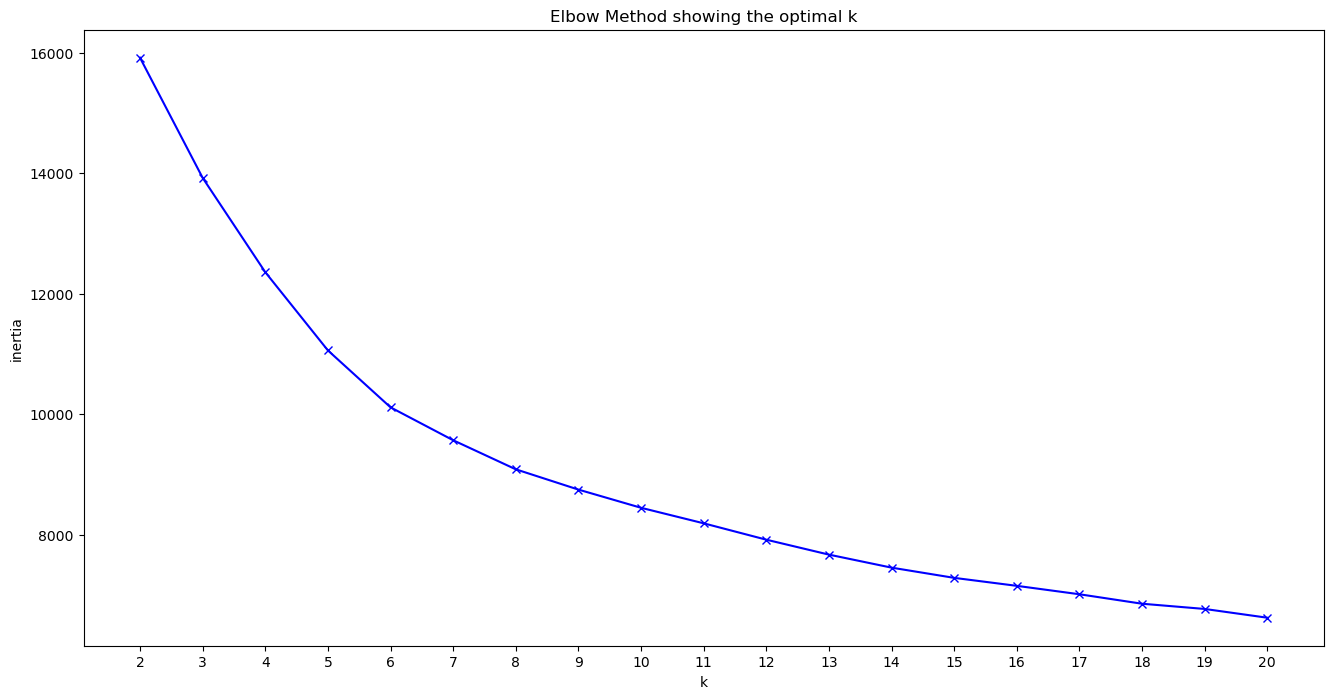

In [14]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Silouhette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

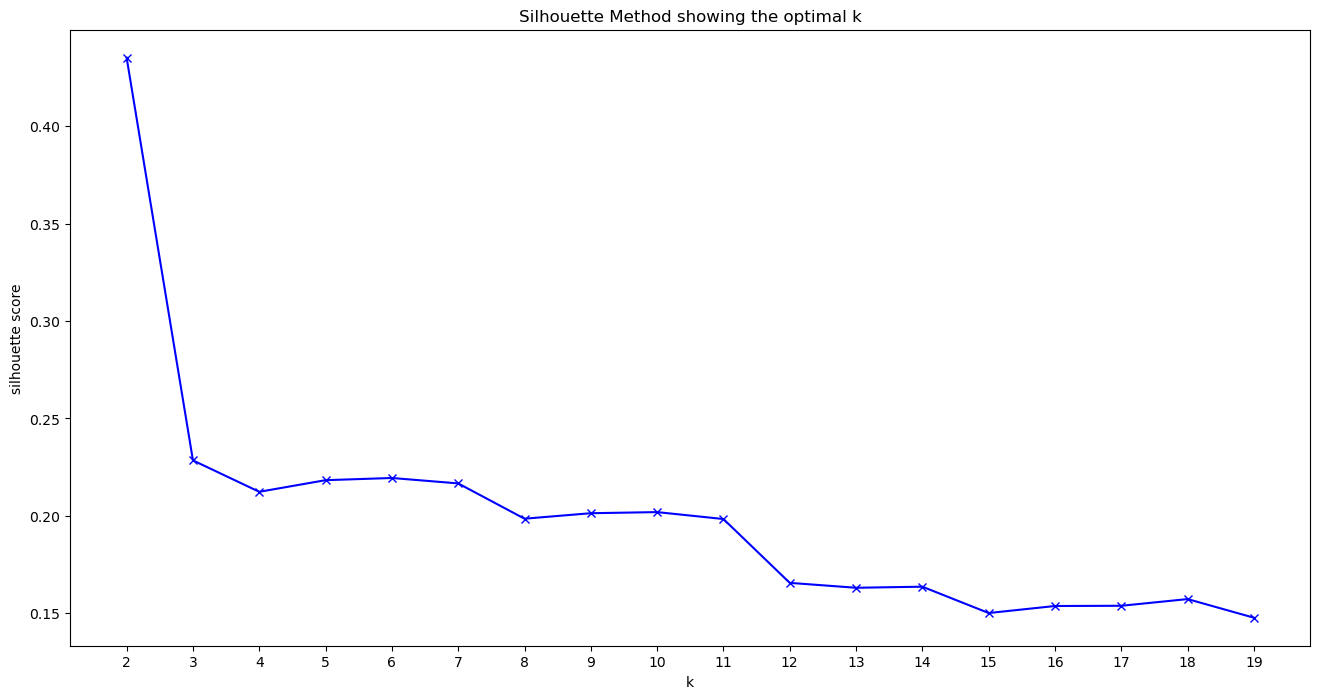

In [15]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

### Clustering the wines with K-Means

K= 6 is the best option

In [16]:
kmeans = KMeans(n_clusters= 6, random_state=1000)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=6, random_state=1000)

In [17]:
kmeans.labels_

array([3, 3, 3, ..., 5, 4, 5])

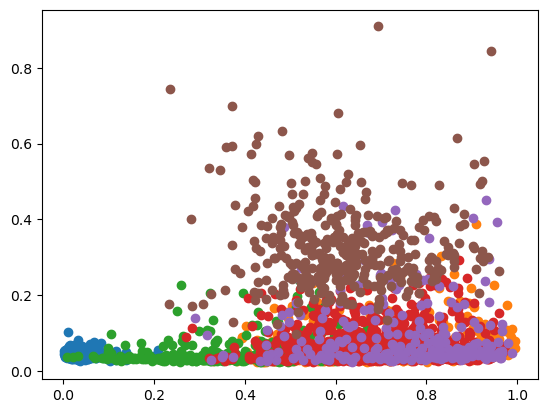

In [18]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [19]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    308
1    445
2    324
3    721
4    259
5    366
dtype: int64

In [20]:
X_id['cluster'] = kmeans.labels_

In [21]:
X_id

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
0,0.707,0.681,-4.325,0.0668,0.06320,0.000005,0.0322,0.646,117.999,0yLdNVWF3Srea0uzk55zFn,200455,3
1,0.644,0.735,-5.747,0.0391,0.05210,0.144000,0.1610,0.418,88.980,1Qrg8KqiBpW07V7PNxwwwL,153947,3
2,0.696,0.809,-8.254,0.0500,0.25200,0.000128,0.2480,0.857,132.962,6AQbmUe0Qwf5PZnt4HmTXv,131013,3
3,0.538,0.742,-5.355,0.1140,0.13800,0.000047,0.0934,0.250,96.107,5Z2MiIZ5I3jJvvmeWMLbOQ,272373,1
4,0.662,0.398,-6.691,0.0275,0.71600,0.000000,0.1110,0.468,107.001,4sx6NRwL6Ol3V6m9exwGlQ,145850,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2878,0.636,0.656,-7.123,0.3440,0.02190,0.000000,0.1300,0.362,75.962,2nLwnTorexhx3qKRY7zymH,177012,5
2881,0.753,0.424,-10.620,0.5990,0.19700,0.000000,0.0694,0.714,162.878,5ckdswsm7RQzCTBoNiyl7T,100180,5
2893,0.501,0.699,-4.733,0.2480,0.17100,0.000000,0.1230,0.671,85.267,7rGzPK1JTUn91efeiIidNo,201124,5
2895,0.645,0.842,-3.023,0.0983,0.00816,0.000000,0.3960,0.237,150.039,2kMuUWfsueRPYWxyaTSHd8,121600,4


# Finding cluster

### Installing Spotipy

In order to use the Spotify API (SpotiPy) we will have to create an account in Spotify and follow these steps. Once we have done it we will start initializing the API and look at the search method for which we can introduce a "query" q, in this example we will try it with Lady Gaga:

In [22]:
##!conda install -c conda-forge spotipy

### Loading credentials from another config file

In [23]:
import config

### Starting with Spotify API

In [24]:
import spotipy
import json
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

In [25]:
#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

#### finding a song

In [26]:
results = sp.search(q="falling",limit=3, market="GB")

In [27]:
results['tracks']['items'][0].keys()

dict_keys(['album', 'artists', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'is_playable', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [28]:
# find the songs' id
song_id = results['tracks']['items'][0]['id']

In [29]:
# find the name of the artist
artist = results['tracks']['items'][0]['artists'][0]['name']

#### get the features of this song and store it into a dataframe

In [30]:
song_features = sp.audio_features(results['tracks']['items'][0]['id'])[0]

In [31]:
df=pd.DataFrame(song_features, index= range(0,1))
df=df[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","duration_ms",]]

In [32]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.567,0.267,-6.502,0.0299,0.839,0.000001,0.089,0.0592,110.011,240133


#### scaling

In [33]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled_df = pd.DataFrame(df_scaled, columns = df.columns) # transform df_scaled into dataframe
display(df.head())
print()


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.567,0.267,-6.502,0.0299,0.839,0.000001,0.089,0.0592,110.011,240133


#### predicting

In [34]:
# assign a cluster to each example
labels = kmeans.predict(df_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)

#### find the same clusters in the list of the songs

In [35]:
mask = (X_id['cluster'] == 3)

# use the mask to select the rows where the comparison is true
result = X_id[mask]

In [36]:
result

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
0,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,0yLdNVWF3Srea0uzk55zFn,200455,3
1,0.644,0.735,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,1Qrg8KqiBpW07V7PNxwwwL,153947,3
2,0.696,0.809,-8.254,0.0500,0.2520,0.000128,0.2480,0.857,132.962,6AQbmUe0Qwf5PZnt4HmTXv,131013,3
6,0.778,0.632,-5.600,0.0493,0.2740,0.000000,0.0915,0.498,122.104,4nrPB8O7Y7wsOCJdgXkthe,218289,3
7,0.801,0.806,-5.206,0.0381,0.3820,0.000669,0.1140,0.802,106.999,0WtM2NBVQNNJLh6scP13H8,239318,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2832,0.889,0.496,-6.365,0.0905,0.2590,0.000000,0.2520,0.544,86.003,2IRZnDFmlqMuOrYOLnZZyc,180522,3
2836,0.746,0.690,-7.956,0.1640,0.2470,0.000000,0.1010,0.497,89.977,7ytR5pFWmSjzHJIeQkgog4,181733,3
2839,0.695,0.555,-8.500,0.0509,0.1410,0.826000,0.1100,0.260,150.024,74loibzxXRL875X20kenvk,83200,3
2847,0.905,0.647,-5.065,0.1070,0.0187,0.000000,0.2820,0.367,130.970,2r6OAV3WsYtXuXjvJ1lIDi,190534,3


In [37]:
sample_id = X_id [X_id ['cluster'] == 3].sample()

In [38]:
sample_id

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
1623,0.734,0.586,-11.866,0.129,0.125,0.0,0.0367,0.762,109.933,3nFJbZCHP4d9vduKjJLdBL,230467,3


In [39]:
# find the id of the song
sample_id['id'].values[0]

'3nFJbZCHP4d9vduKjJLdBL'

In [40]:
# play the song
from IPython.display import IFrame

def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [41]:
play_song(sample_id['id'].values[0])

# Combining with input function

In [42]:
# import the dataframe of billboard 100 
song_list = pd.read_csv('C:/Users/dengd/Documents/GitHub/MelodyMate/billboards_100.csv')

In [43]:
# find song id based on song and artist name.
def find_track_id(song,artist):
    results = sp.search(q=song,limit=30,market="GB")
    for i in range(len(results['tracks']['items'])):
        if results['tracks']['items'][i]['artists'][0]['name'] == artist:
            track_id = results["tracks"]["items"][i]["id"]
    return track_id

In [44]:
# find the first song's id 
def find_track_first_id(song):
    results = sp.search(q=song,limit=1,market="GB")
    track_id = results["tracks"]["items"][0]["id"]
    return track_id

In [45]:
song_id = find_track_id('perfect','One Direction')

In [46]:
play_song(song_id)

In [47]:
# if user's song is not in the list of billboard 100, define a function to list songs' names and artists' names as pairs in spotify to recommend a song to them.
def song_artist_pairs(song):
    song_list = []
    artist_list  = []
    results = sp.search(q=song,limit=5, market="GB")
    for i in range(len(results['tracks']['items'])):
        song_name = results['tracks']['items'][i]['name']
        artist_name = results['tracks']['items'][i]['artists'][0]['name'] 
        
        # add items to the lists seperately
        song_list.append(song_name)
        artist_list.append(artist_name)
        
    song_artist_list = [f'{i+1}.{x} - {y}' for i, (x,y)in enumerate(zip(song_list,artist_list))]
    
    return song_list,artist_list, song_artist_list

In [48]:
# define a function to store the final_choosen_song's features into a dataframe.
def final_choosen_song_feature(song_id):
    song_features = sp.audio_features(tracks = [song_id])
    features_df = pd.DataFrame(song_features)
    features_df = features_df[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","duration_ms",]]
    return features_df
    
# define a function to scale the features and predict the cluster number. 
def final_choosen_song_cluster(features_df):
    scaler = StandardScaler()
    scaler.fit(X)
    features_df_scaled = scaler.transform(features_df)
    features_df_scaled_df = pd.DataFrame(features_df_scaled, columns = features_df.columns)
    label = kmeans.predict(features_df_scaled_df)[0]
    
    return label
    
# define a funtion to select a song's id which in the same cluster. 
def recommend_song_id(final_choosen_song_cluster):
    select_cluster_df =  X_id[X_id['cluster']== final_choosen_song_cluster]
    select_cluster_sample_id = select_cluster_df.sample()['id'].values[0]
    return select_cluster_sample_id

In [49]:
def MelodyMate1():
    while True:
        name_input = input("what do you want to listen to? ")  
        match_ratios = [fuzz.token_set_ratio(name_input.lower(),i.lower()) for i in song_list['song']]
        max_ratio = max(match_ratios)
        
        if  max_ratio >70:
            name_input = song_list['song'][ match_ratios.index(max_ratio)]# 修正名字
            select_artist_name = song_list.loc[song_list['song'].str.lower()== name_input.lower(),'artist'].iloc[0]
            confirm = input(f'Do you mean the song {name_input} performed by {select_artist_name}? (Y/N)')
            if confirm.upper() == 'Y':
                print('Playing ' + name_input + ' right away.')
                display(play_song(find_track_first_id(name_input))) # play the song
                
                
                random_song = random.sample(song_list['song'].tolist(),k=1)[0]
                ask_recommend = input(f'Would you like to listen to another Hot song: {random_song}? (Y/N)')
                
                if ask_recommend.upper() =='Y':
#                     select_artist_name_random = song_list.loc[song_list['song'].str.lower()== random_song.lower(),'artist'].iloc[0]
                    display(play_song(find_track_first_id(random_song)))# play the random song 
                    print("Thank you for using MelodyMate!")
                    break
                else: 
                    print("Thank you for using MelodyMate!")
                    break
            else:
                choose_song_list,choose_artist_list, choose_song_artist_list = song_artist_pairs(name_input)
                # if the input name is not in the billboard 100, then ask users to choose the recommended songs.
                
                choose_song_str = '\n'.join(choose_song_artist_list)
                print(f'Would you like to choose one of these songs? \n{choose_song_str}')
                
                choose_song_input = input('Please choose the number of the song.')
                
                if choose_song_input.isdigit() and int(choose_song_input) in range(1, len(choose_song_artist_list)+1):
                    final_choose_song = choose_song_list[int(choose_song_input)-1] 
                    final_choose_artist = choose_artist_list[int(choose_song_input)-1] 
                    final_choose_id = find_track_id(final_choose_song,final_choose_artist) # find the chosen song's id 
                    print(f'OK! Now playing {final_choose_song} performed by { final_choose_artist } for you! ')
                    display(play_song(final_choose_id))
                    
                    # recommend another similar song in spotify for users.
                    recommend_spotify_song = input('Do you want to try another song? （Y/N)?')
                    if recommend_spotify_song.upper() == 'Y':
                        recom_spotify_song_features_df = final_choosen_song_feature(final_choose_id)
                        recom_spotify_song_cluster = final_choosen_song_cluster(recom_spotify_song_features_df)
                        recom_spotify_song_id = recommend_song_id(recom_spotify_song_cluster)
                        display(play_song(recom_spotify_song_id)) # play the recommend song of spotify
                        print("Thank you for using MelodyMate!")
                        break
                    else:
                        print("Thank you for using MelodyMate!")
                        break
                else: 
                    print(f'Please enter a number between 1 and {len(choose_song_artist_list)}.')
                             
        else: 
            random_song =random.sample(song_list['song'].tolist(),k=5)
            recomend_song_not_in_list = input('This song is not in the list, do you want to listen to a diffrent song in the Hot list? (Y/N)')
            if recomend_song_not_in_list.upper()=="Y":
                print(f'Here are the recommendations: {random_song}')
                continue
            else:
                print("Thank you for using MelodyMate!")
                break
                

In [50]:
MelodyMate1()

what do you want to listen to? flower
Do you mean the song Flowers performed by Miley Cyrus? (Y/N)y
Playing Flowers right away.


Would you like to listen to another Hot song: Fin de Semana? (Y/N)n
Thank you for using MelodyMate!
